# Linear Regression Models to Predict House Sale Prices

**Colin Moller**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract
 
 
Using linear regression, 12 models were created to predict house sale prices. The models ranged from 5 to 30 variables/features. Furthermorer, half the models had Sale Price as the dependent variable and the other half had log of Sales Price as the dependent variable.

As more variables were added, the models became more accurate with more explanatory power (as denoted by an increasing R<sup>2</sup>). The models were tested against the test data and the results were compared. The 30 feature log model performed the best (R<sup>2</sup> of 0.907 on the train data and R<sup>2</sup> of 0.863 on the test) and was accurately able to predict house prices in the previously unseen test data.

[Back to top](#Index)


## 1. Introduction


In this project, a linear regression model was trained to predict the sale price of a house. First, all necessary libraries were imported. Next the data was imported from a CSV file and briefly explored using various Pandas functions and graphs utilizg both Seaborn and Matplotlib. From there, the data was cleaned and prepared for further analysis. The data was analyzed to determine the relationship between the variables and the price of the house using  Using Pearson correlation coefficients, the top 30 numerical independent variables/features were gathered. From here 12 models were trained on the best 5, 10, 15, 25 and 30 independent variables.  Half were given SalePrice as the dependent variable and the other half the log of SalePrice. Scikitlearns linear regression model was utilized to produce said models. R<sup>2</sup> and predicted SalePrice were both used to find the best performing linear regression models. The two best models were then used to predict house sale prices on a set of unseen test data. Again R<sup>2</sup> values and predicted SalesPrice were both used to evaluate the performance of the models.


[Back to top](#Index)

## 2. The Data


[Back to top](#Index)

### 2.1 Import the Data


In [1]:
# Importing the libraries and functions
import pandas as pd #for dataframes and data manipulation
import numpy as np #for mathematical functions
import matplotlib.pyplot as plt #for plotting
import seaborn as sns # also for plotting
from sklearn import linear_model #for building the linear regression model

In [2]:
# Importing the houseSmallData.csv dataset and storing it in a variable
df = pd.read_csv('houseSmallData.csv', index_col = 0) #first column as the index
df.head() # to quickly check the data has been entered correctly

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#Index)

### 2.2 Data Exploration


In [3]:
#explore the shape of the dataset
df.shape

(100, 81)

In [4]:
# briefly explore the variables/columns non-null count and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   MSSubClass     100 non-null    int64  
 2   MSZoning       100 non-null    object 
 3   LotFrontage    86 non-null     float64
 4   LotArea        100 non-null    int64  
 5   Street         100 non-null    object 
 6   Alley          6 non-null      object 
 7   LotShape       100 non-null    object 
 8   LandContour    100 non-null    object 
 9   Utilities      100 non-null    object 
 10  LotConfig      100 non-null    object 
 11  LandSlope      100 non-null    object 
 12  Neighborhood   100 non-null    object 
 13  Condition1     100 non-null    object 
 14  Condition2     100 non-null    object 
 15  BldgType       100 non-null    object 
 16  HouseStyle     100 non-null    object 
 17  OverallQual    100 non-null    int64  
 18  OverallCond

In [5]:
#Summary statistics of numerical variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,100.000000,100.000000,86.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.0,0.0,100.000000,100.000000,100.00000,100.000000
mean,50.500000,52.000000,71.406977,10115.870000,5.980000,5.50000,1971.410000,1983.920000,121.640000,454.560000,...,46.900000,24.130000,7.270000,10.160000,0.0,NaN,46.300000,6.330000,2007.90000,173820.660000
std,29.011492,42.545282,21.093840,5130.541763,1.530696,0.97959,29.373284,20.967353,213.553982,462.034922,...,59.743306,60.211019,51.518724,46.908835,0.0,NaN,153.692958,3.048613,1.35959,72236.552886
min,1.000000,20.000000,21.000000,1596.000000,3.000000,2.00000,1910.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.00000,40000.000000
25%,25.750000,20.000000,60.000000,7643.250000,5.000000,5.00000,1954.750000,1964.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.750000,2007.00000,129362.500000
50%,50.500000,45.000000,70.000000,9595.500000,6.000000,5.00000,1970.000000,1994.000000,0.000000,416.000000,...,30.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.00000,153750.000000
75%,75.250000,60.000000,84.000000,11243.250000,7.000000,6.00000,2000.250000,2003.250000,188.500000,737.500000,...,72.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.00000,207750.000000
max,100.000000,190.000000,122.000000,50271.000000,10.000000,8.00000,2009.000000,2009.000000,1115.000000,1880.000000,...,258.000000,272.000000,407.000000,291.000000,0.0,NaN,700.000000,12.000000,2010.00000,438780.000000


In [6]:
#looking specifically at the dependent variable (SalePrice)
df.SalePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

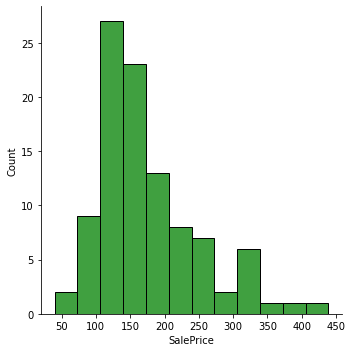

In [7]:
#plotting the SalePrice in $1,000's to get an idea of the distribution
sns.displot(df.SalePrice/1000, kde= False, color='green')

The distribution obviosuly is skewed and not centered (non-gausian distribution).

In [8]:
#looking at the skewness of the SalePrice
df.SalePrice.skew()

1.1783462304851948

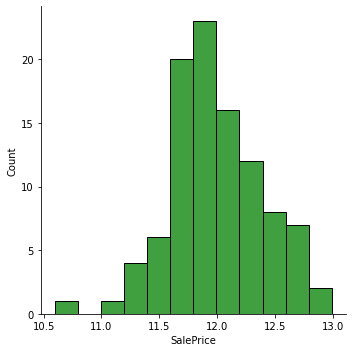

In [9]:
#plotting the log of the SalePrice for a more normal distribution
sns.displot(np.log(df.SalePrice), kde= False, color='green')

The log of Sale_price produces a more normalized distribution.

In [10]:
#looking at the skewness of the log of the SalePrice
np.log(df.SalePrice).skew()

-0.09632240207755555

The skewness of the log (-.096) is definetley better and more normally distributed than the original  (1.18).

In [11]:

#I decided to use the entire dataset for one because 100 rows in not that large of a dataset.
#Having 10 times the number of observations as features is a desirable minimum that, even with keeping all the observations, can't be met. <sup>1</sup> is a good measure of how well the model fits the data.
#The hope is that using all 100 observations will provide a better fitting model and an avoid an overfitting to a small dataset.<sup>2</sup>
#We will be able to test against 100 rows of unseen data so it makes sense not to divide this data.
train = df.iloc[0:100,:]
train.shape
#target variable as log of SalePrice
target= np.log(train.SalePrice)

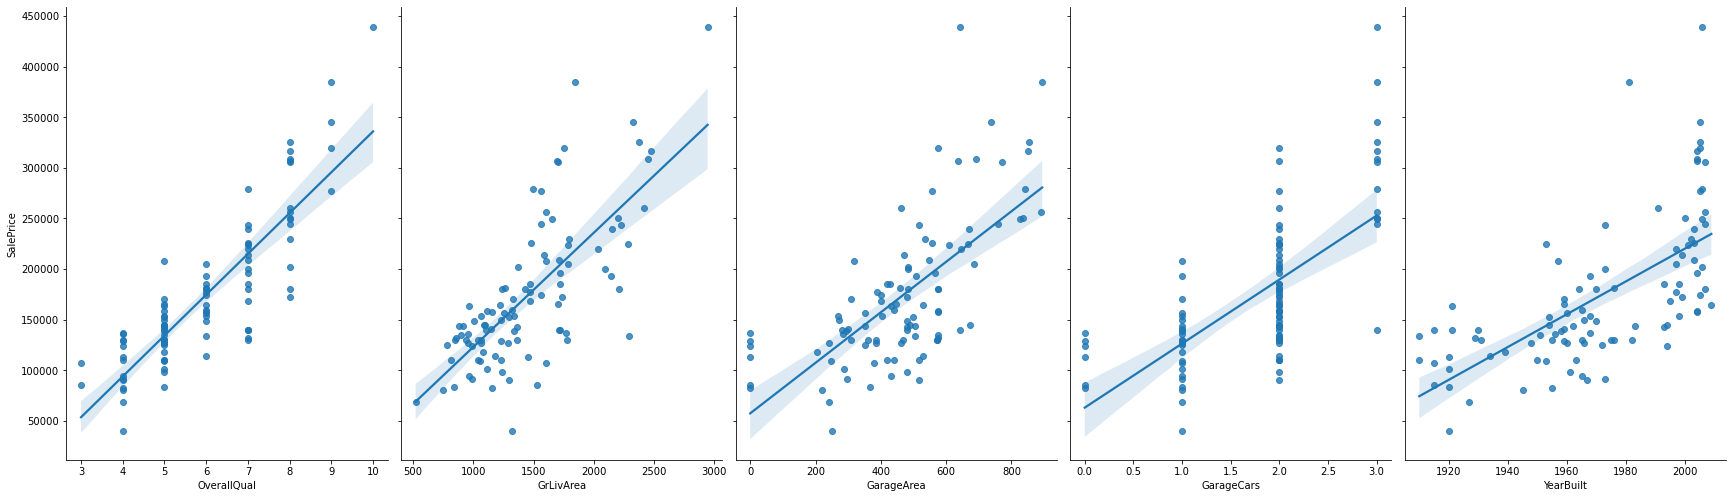

In [12]:
#plotting the top 5 variables with highest correlation against SalePrice
sns.pairplot(train, x_vars=['OverallQual', 'GrLivArea', 'GarageArea','GarageCars', 'YearBuilt'], y_vars='SalePrice', height=7, aspect=0.7, kind='reg')


These trendlines look strong and it is evident that these are important variables to predict the house price. Overall quality, above ground living area and year built seem like pretty obvious contributers to me. The other two garage related variables also make sense but I can imagine them being less universally important depending on what climate the house is in. Accordingly, a large national model might have to contend with these issues and account for it in the model. 

Plotting the top 5 variables with highest correlation individually with the log of SalePrice (Target) to get a better enlarged view of the relationship between the variables and the sale price:

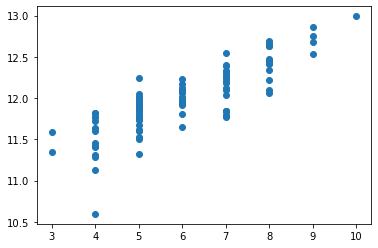

In [13]:
#plotting OverallQual and Target
plt.scatter(train.OverallQual, target)

This graph clealy shows that the greater the overall quality of a house, the greater sales price.

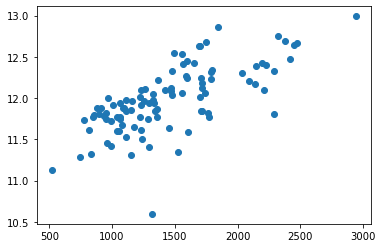

In [14]:
#plotting GrLivArea and Target
plt.scatter(train.GrLivArea, target)

More above ground living area drives the price up.

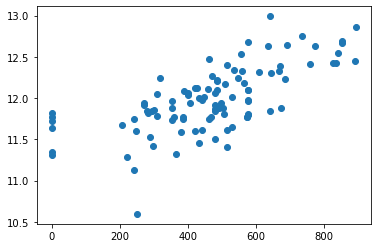

In [15]:
#plotting GarageArea and Target
plt.scatter(train.GarageArea, target)

Larger garage areas are desirable and drive up house prices.

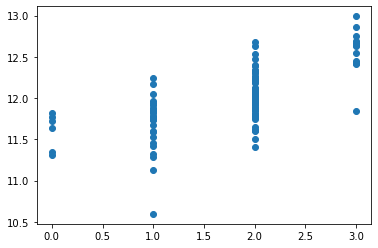

In [16]:
#plotting GarageCars and Target with trend line
plt.scatter(train.GarageCars, target)

The more cars the garage can fit, the more expensive the house.

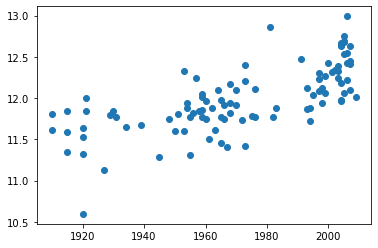

In [17]:
#plotting YearBuilt and Target
plt.scatter(train.YearBuilt, target)

Newer houses seem to fetch higher prices.

The five scatter plots above reiterate the importance of the variables to predict the house price. All are strongly correlated with the sales price of a house.

[Back to top](#Index)

### 2.3 Data Preparation

In [18]:
#examining the null values
train.isnull().sum().sort_values(ascending=False)[0:20]

PoolQC          100
Alley            94
MiscFeature      91
Fence            77
FireplaceQu      54
LotFrontage      14
GarageCond        6
GarageType        6
GarageYrBlt       6
GarageFinish      6
GarageQual        6
BsmtCond          3
BsmtFinType2      3
BsmtQual          3
BsmtExposure      3
BsmtFinType1      3
TotRmsAbvGrd      0
Id                0
KitchenQual       0
Functional        0
dtype: int64

In [19]:
#dropping the columns with null values over 10% of their data
train.drop('PoolQC', axis=1, inplace=True)
train.drop('Alley', axis=1, inplace=True)
train.drop('MiscFeature', axis=1, inplace=True)
train.drop('Fence', axis=1, inplace=True)
train.drop('FireplaceQu', axis=1, inplace=True)
train.drop('LotFrontage', axis=1, inplace=True)
#Using the correlation heatmap below I also came to realize that both ID and PoolArea needed to be dropped
#ID is made up for the dataset and has no real correlation with SalePrice
#Poolarea follows the PoolQC and is not present in the dataset
train.drop('Id', axis=1, inplace=True)
train.drop('PoolArea', axis=1, inplace=True)
#I reckognize the error that appears below but found that withouth the inplace=True the dataframe was not as I wanted
#The output seems good regardless of error

C:\Users\Colin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


The decision to scrap columns with null values above 10% was made because of the size of the sample. I did not want to skew the models or have them overfit the training data. Perhaps with a larger sample size it would be better to replace the null values with the mean of the column. That certainly could have been done here, but I feel the set is to small for that. 

The approach taken may miss out on the explanatory power of some variables (especially LotFrontage), but hopefully is validated with the resulting good performance of the models.

In [20]:
#changine the data to numeric values
data=train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape


(100, 35)

In [21]:
#examining what is left
data.head()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,12,2008,250000


In [22]:
#info on data for colunms
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     100 non-null    int64  
 1   LotArea        100 non-null    int64  
 2   OverallQual    100 non-null    int64  
 3   OverallCond    100 non-null    int64  
 4   YearBuilt      100 non-null    int64  
 5   YearRemodAdd   100 non-null    int64  
 6   MasVnrArea     100 non-null    float64
 7   BsmtFinSF1     100 non-null    int64  
 8   BsmtFinSF2     100 non-null    int64  
 9   BsmtUnfSF      100 non-null    int64  
 10  TotalBsmtSF    100 non-null    int64  
 11  1stFlrSF       100 non-null    int64  
 12  2ndFlrSF       100 non-null    int64  
 13  LowQualFinSF   100 non-null    int64  
 14  GrLivArea      100 non-null    int64  
 15  BsmtFullBath   100 non-null    int64  
 16  BsmtHalfBath   100 non-null    int64  
 17  FullBath       100 non-null    int64  
 18  HalfBath   

As evident, the shape of the data has changed! Dropping the non-numeric columns and getting rid of some overly null filled colums has brought us from 81 columns to 35 columns. By dropping the non-numeric columns and cleaning the nulls, we should have nicely cleaned data ready for linear regression.

[Back to top](#Index)

### 2.4 Correlation

A Pearson correlation coefficient is a measure of the dependence of two variables. The correlation coefficient ranges from -1 to 1 
* -1 means that there is complete negative linear dependence
* 1 means that there is complete positive linear dependence
* 0 means that the two variables are uncorrelated

Selecting variables with strong Pearson correlation coefficients will ultimatly lead to a better linear regression model. 

In [23]:
#findining the Pearson correlations
corr = data.corr()
#looking at saleprice column of the correlation matrix in descending order
corr['SalePrice'].abs().sort_values(ascending=False)[0:26]
#absolute value was used because we want inverse correlations as well

SalePrice        1.000000
OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.589361
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
OpenPorchSF      0.301960
BsmtFinSF1       0.266713
YrSold           0.262683
MoSold           0.256863
KitchenAbvGr     0.235659
EnclosedPorch    0.233483
BedroomAbvGr     0.233426
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Correlation Map')

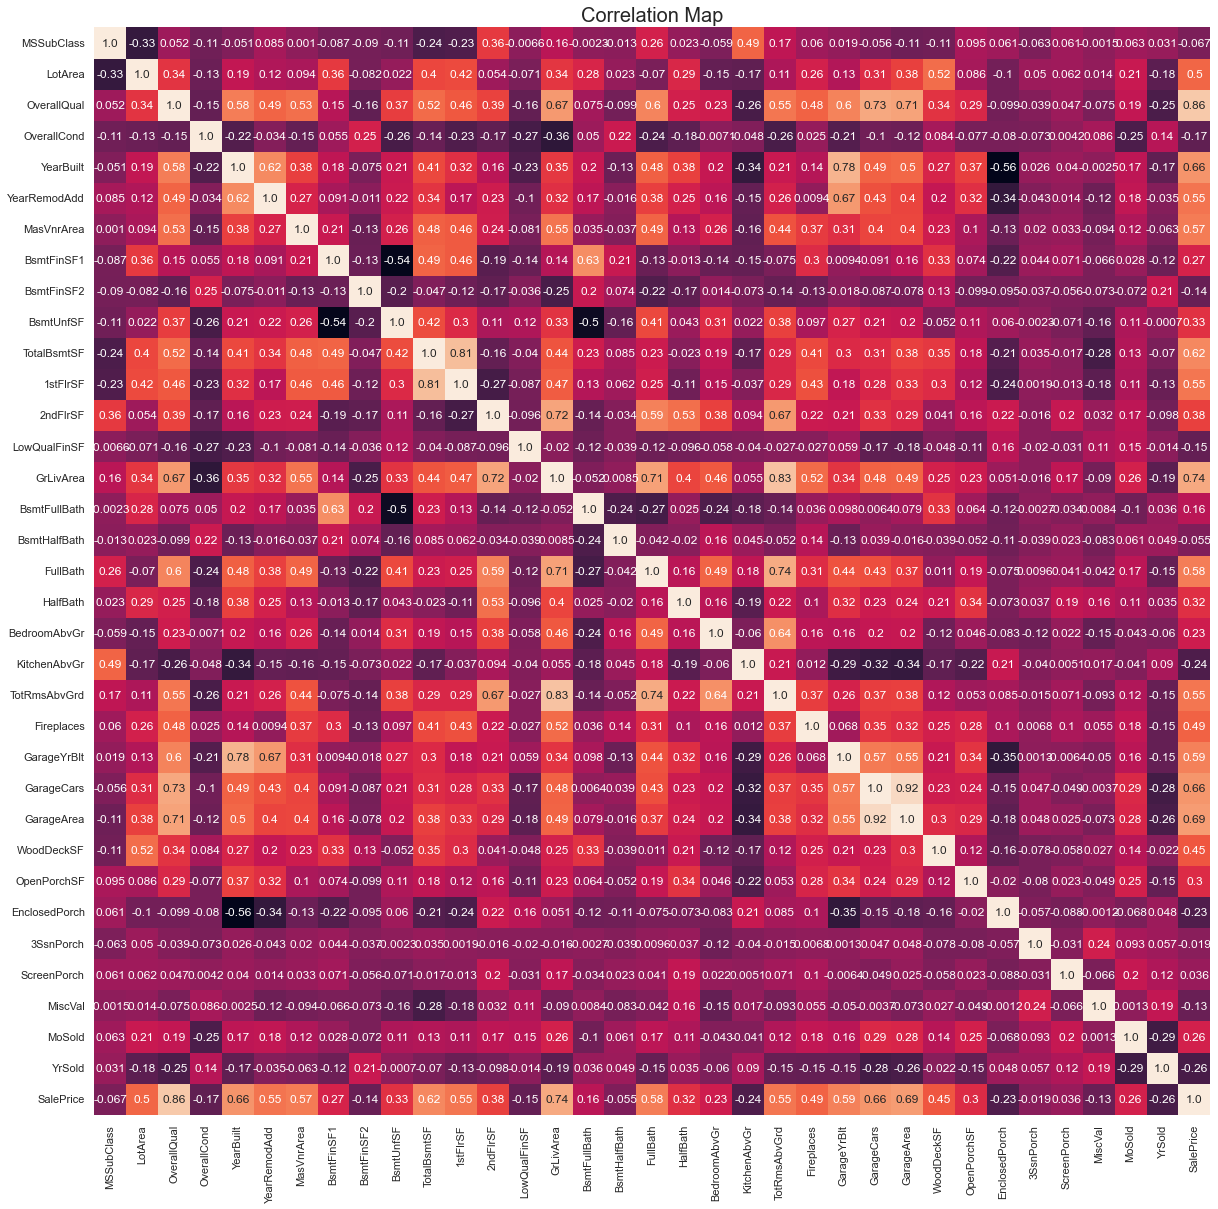

In [51]:
#A heat map of the correlation matrix to get a better visual sense of the correlations
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corr,cbar=False,annot=True,fmt=".2").set_title('Correlation Map',fontsize = 20)

In [25]:
#capturing the variable names of the top 5, 10, 15, 20, 25 and 30 correlation coefficients
#absolute value because we want inverse correlations as well
cols5=corr['SalePrice'].abs().sort_values(ascending=False)[0:6].index
cols10=corr['SalePrice'].abs().sort_values(ascending=False)[0:11].index
cols15=corr['SalePrice'].abs().sort_values(ascending=False)[0:16].index
cols20=corr['SalePrice'].abs().sort_values(ascending=False)[0:21].index
cols25=corr['SalePrice'].abs().sort_values(ascending=False)[0:26].index
col30=corr['SalePrice'].abs().sort_values(ascending=False)[0:31].index
col30 #verifying the column names captured

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea',
       'TotRmsAbvGrd', '1stFlrSF', 'YearRemodAdd', 'LotArea', 'Fireplaces',
       'WoodDeckSF', '2ndFlrSF', 'BsmtUnfSF', 'HalfBath', 'OpenPorchSF',
       'BsmtFinSF1', 'YrSold', 'MoSold', 'KitchenAbvGr', 'EnclosedPorch',
       'BedroomAbvGr', 'OverallCond', 'BsmtFullBath', 'LowQualFinSF',
       'BsmtFinSF2', 'MiscVal'],
      dtype='object')

The Pandas corr() function was used to find the highest pearson correlation features to be included in the model. From there, the features were ranked by their absolute value to find the highest values irrespective of if they were positive or negative correaltions.
The features were then sorted into ranked lists of the top 5, 10, 15, 20, 25 and 30 features. These will be used to build the linear regression models below.


[Back to top](#Index)

## 3. Project Description


For this linear regression model to accurately predict house prices, the R<sup>2</sup> value must be as high as possible in the testing phase. The approach taken here was to add features to the model. By capturing a bigger picture with 30 variables, the logic would be that the model has more explanatory power. As the model progressed from 5 to 30 variables, the R<sup>2</sup> value also increased. This makes sense, becuase the more features, the better the explanatory power.

The 30 independent variables/features selected were chosen by their correlation coefficient. A variable has better explanatory value (therefor helping acheive a better R<sup>2</sup>) if it is close to 1 or -1. Since we care about the explanatory power and not if it is a correlation or inverse correlation, an absolute value was taken before ranking the variables.

Furthermore, both the SalePrice and the log of SalePrice were included in the model. The log was used for a more normal distribution and hopefully to make the model more robust to outliers. The goal once again was to try to acheive a better R<sup>2</sup>. Though the R<sup>2</sup> values were relatively close between the log and non-log models in training, in testing the log model produced a higher R<sup>2</sup>, validating its use.

The models were fitted, predictions were made and an R<sup>2</sup> values generated. The latter two were crucially important for evaluating each models performance.

By using more variables and the log of the Sale_Price, the end result was a linear regression model that performed better and improved upon Dr. Williams' model.


[Back to top](#Index)

### 3.1 Linear Regression

It is said that the term regression was coined by Francis Galton while examining the inheritable traits of both plants and animals. The term was coined because the plants and animals were able to inherit traits from their ancestors. Following that, Karl Pearson expanded upon and gave the mathmatical backing to regression as we understand it today. <sup>3</sup> 

A linear regression model predicts the value of a dependent variable as a function of one or more independent variables. In a sense, the model is a function that finds the best fit line between the dependent and independent variables. It goes without saying, that the better the fit, the better the prediction.

You can do linear regression modeling to model the relationshib between just two variables (known as a simple linear regression model) or more than two variables (known as a multiple linear regression model). In this project, we will be using a simple linear regression model. 

The equation for a linear regression model is: 

Y = b0 + ,m1x1 + m2x2 + m3x3 + ... + mnxn

where Y is the dependent variable, x1, x2, x3, ..., xn are the independent variables, 
b0 is the intercept, m1, m2, m3, ..., mn are the coefficients.
 
It is important to note that techinically, in this project we will be using an ordinary least squares regression model. This is the type of regression that Scikit-Learn library uses to perform a linear regression. <sup>4</sup>

Below are the formulas being used behind the scenes to calculate the coefficients and the intercept:


![](https://i.stack.imgur.com/JxedC.jpg) <sup>5</sup>

Armed with this knowledge, the depdent variable, the independent variables and the appropriate libraries, we can now implement some linear regression models!



[Back to top](#Index)

### 3.2 Analysis 

12 models were constructed in an iterative approach at making a model to accurately predict the sales price of a house. The models were constructed using the following steps:

In [26]:
y = data.SalePrice #dependent variable
ylog=np.log(y) #log of the dependent variable
#Setting up the features/dependent variables for the models
#designating the feature groups to corresponding variables and dropping the dependent variable
x5 = data[cols5].drop(['SalePrice'], axis=1) # 5 highest Pearson coeficients
x10 = data[cols10].drop(['SalePrice'], axis=1) # 10 highest...
x15 = data[cols15].drop(['SalePrice'], axis=1)
x20= data[cols20].drop(['SalePrice'], axis=1)
x25 = data[cols25].drop(['SalePrice'], axis=1)
x30 = data[col30].drop(['SalePrice'], axis=1)
x30

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,...,YrSold,MoSold,KitchenAbvGr,EnclosedPorch,BedroomAbvGr,OverallCond,BsmtFullBath,LowQualFinSF,BsmtFinSF2,MiscVal
0,7,1710,548,2,2003,856,2003.0,2,196.0,8,...,2008,2,1,0,3,5,1,0,0,0
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6,...,2007,5,1,0,3,8,0,0,0,0
2,7,1786,608,2,2001,920,2001.0,2,162.0,6,...,2008,9,1,0,3,5,1,0,0,0
3,7,1717,642,3,1915,756,1998.0,1,0.0,7,...,2006,2,1,272,3,5,1,0,0,0
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9,...,2008,12,1,0,4,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0,6,...,2009,4,1,0,3,8,0,0,0,480
96,7,1588,472,2,1999,1588,1999.0,2,183.0,6,...,2006,8,1,0,3,5,0,0,0,0
97,4,960,432,1,1965,960,1965.0,1,48.0,6,...,2007,5,1,0,3,5,1,0,0,0
98,5,835,366,1,1920,458,1920.0,1,0.0,5,...,2010,5,1,77,2,5,0,0,0,400


In [27]:
#building a linear regression model with 5 features
lm = linear_model.LinearRegression() #using Scikit-Learn linear regression model

model5 = lm.fit(x5, y) #fitting the model
predictions5= model5.predict(x5) #predicting the values
print(f"R^2 is {model5.score(x5,y)}") #printing the R^2 value

R^2 is 0.8309859964337734


In [28]:
#building alinear regression model with 5 features and log of dependent variable
lm = linear_model.LinearRegression() #did not hav to repeat this but found it nice when experimenting with individual boxes

model5_l = lm.fit(x5, ylog)
predictions5_l= model5_l.predict(x5)
print(f"R^2 is {model5_l.score(x5,ylog)}")

R^2 is 0.8234260890762959


In [29]:
#building linear regression model with 10 features
lm = linear_model.LinearRegression()

model10 = lm.fit(x10, y)
predictions10= model10.predict(x10)
print(f"R^2 is {model10.score(x10,y)}")

R^2 is 0.851735450635332


In [30]:
#building linear regression model with 10 features and log of dependent variable
lm = linear_model.LinearRegression()

model10_l= lm.fit(x10, ylog)
predictions10_l= model10_l.predict(x10)
print(f"R^2 is {model10_l.score(x10,ylog)}")

R^2 is 0.8535296692280402


In [31]:
#building linear regression model with 15 features
lm = linear_model.LinearRegression()

model15 = lm.fit(x15, y)
predictions15= model15.predict(x15)
print(f"R^2 is {model15.score(x15,y)}")

R^2 is 0.8824028808099049


In [32]:
#building linear regression model with 15 features and log of dependent variable
lm = linear_model.LinearRegression()

model15_l= lm.fit(x15, ylog)
predictions15_l= model15_l.predict(x15)
print(f"R^2 is {model15_l.score(x15,ylog)}")

R^2 is 0.8786281226660034


In [33]:
#building linear regression model with 20 features
lm = linear_model.LinearRegression()

model20 = lm.fit(x20, y)
predictions20= model20.predict(x20)
print(f"R^2 is {model20.score(x20,y)}")

R^2 is 0.8839337447571718


In [34]:
#building linear regression model with 20 features and log of dependent variable
lm = linear_model.LinearRegression()

model20_l= lm.fit(x20, ylog)
predictions20_l= model20_l.predict(x20)
print(f"R^2 is {model20_l.score(x20,ylog)}")

R^2 is 0.885089593313021


In [35]:
#building linear regression model with 25 features
lm = linear_model.LinearRegression()

model25 = lm.fit(x25, y)
predictions25= model25.predict(x25)
print(f"R^2 is {model25.score(x25,y)}")

R^2 is 0.88982350232091


In [36]:
#building linear regression model with 25 features and log of dependent variable
lm = linear_model.LinearRegression()

model25_l= lm.fit(x25, ylog)
predictions25_l= model25_l.predict(x25)
print(f"R^2 is {model25_l.score(x25,ylog)}")

R^2 is 0.8907827904204525


In [37]:
#building linear regression model with 30 features
lm = linear_model.LinearRegression()

model30 = lm.fit(x30, y)
predictions30= model30.predict(x30)
print(f"R^2 is {model30.score(x30,y)}")

R^2 is 0.897485259384045


In [38]:
#building linear regression model with 30 features and log of dependent variable (the best model)
lm = linear_model.LinearRegression()

model30_l= lm.fit(x30, ylog)
predictions30_l= model30_l.predict(x30)
print(f"R^2 is {model30_l.score(x30,ylog)}")

R^2 is 0.9067539613365636


[Back to top](#Index)

### 3.3 Results

The results clearly illustrated that as the number of features increased, the R<sup>2</sup> value also increased. This makes sense, because the more features, the better the explanatory power. The more features the better the fit of the model. The more features the more of the house buyers' perception  you are able to quantify.  

* A caveat to this thouigh, is that the explanatory power of each additional feature discapates. This is to say, adding 5 additional features to the 5 feature model gives more of an R<sup>2</sup> value increase than adding 5 to the 25 feature model. Since the features were sorted by correlation coefficient, this makes sense. The earlier the feature was added, the more explanatory power it had.

Furthermore, not only can you note the difference in R<sup>2</sup> values between the 5 feature and 30 feature model (a 0.063 improvement), you can also see that the grouping is better/tighter on the histograms below. 

On the other hand, the superiorty of the log SalePrice model was not as clear cut. It performed better on 4 of the 6 times. It did seem to do better with higher feature models. The validity of the using the log of the Sale_Price was, however, ultimately validated in the testing phase with a 0.057 higher R<sup>2</sup> value between the the log and non-log 30 feature model.

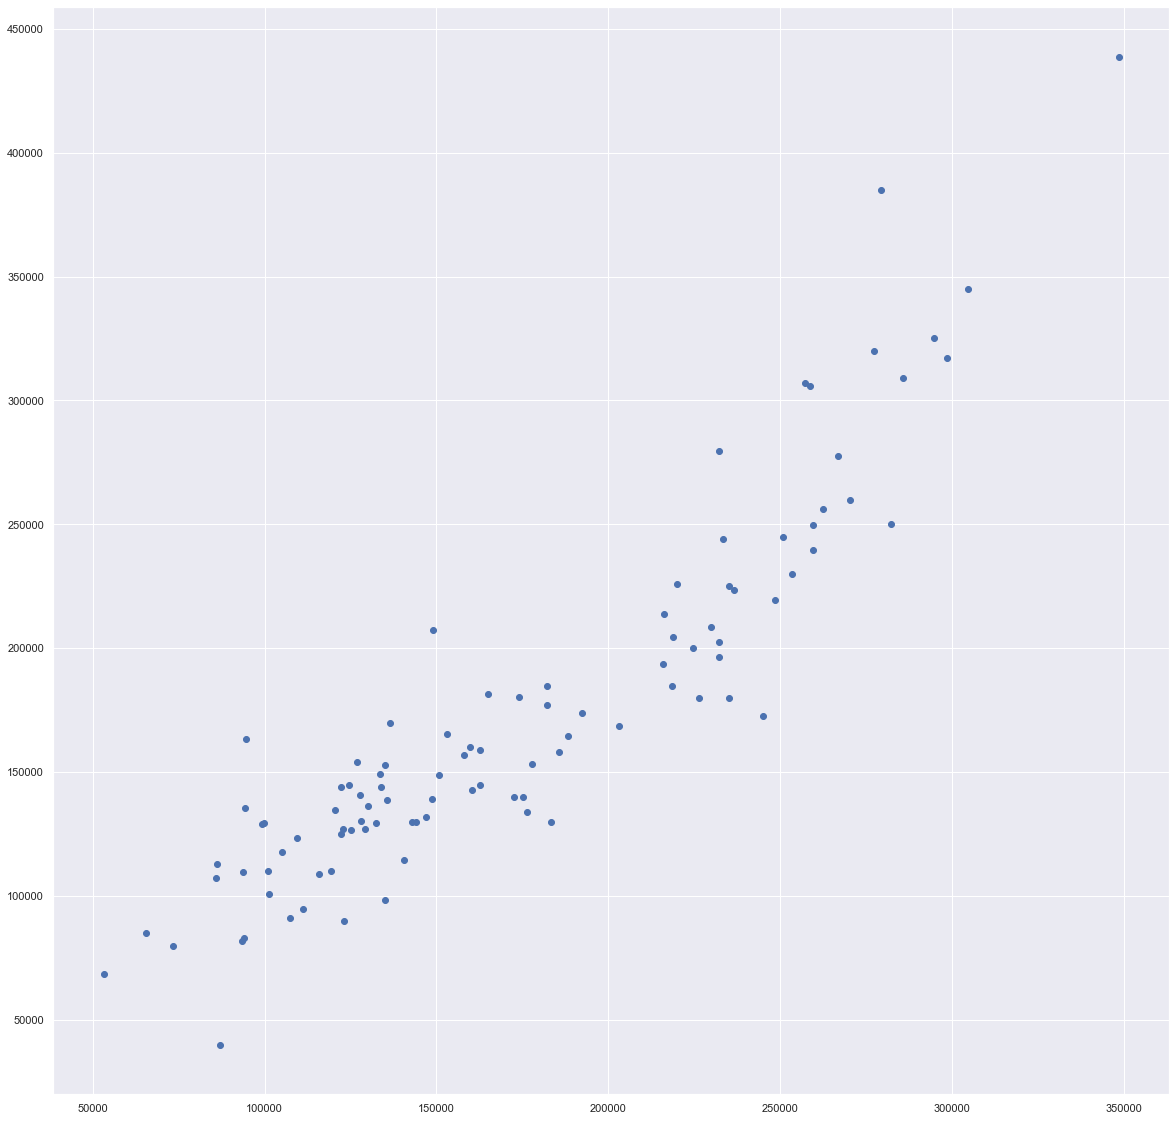

In [39]:
#Plotting the 5 feature model predictions vs actual values
plt.scatter(predictions5,y)

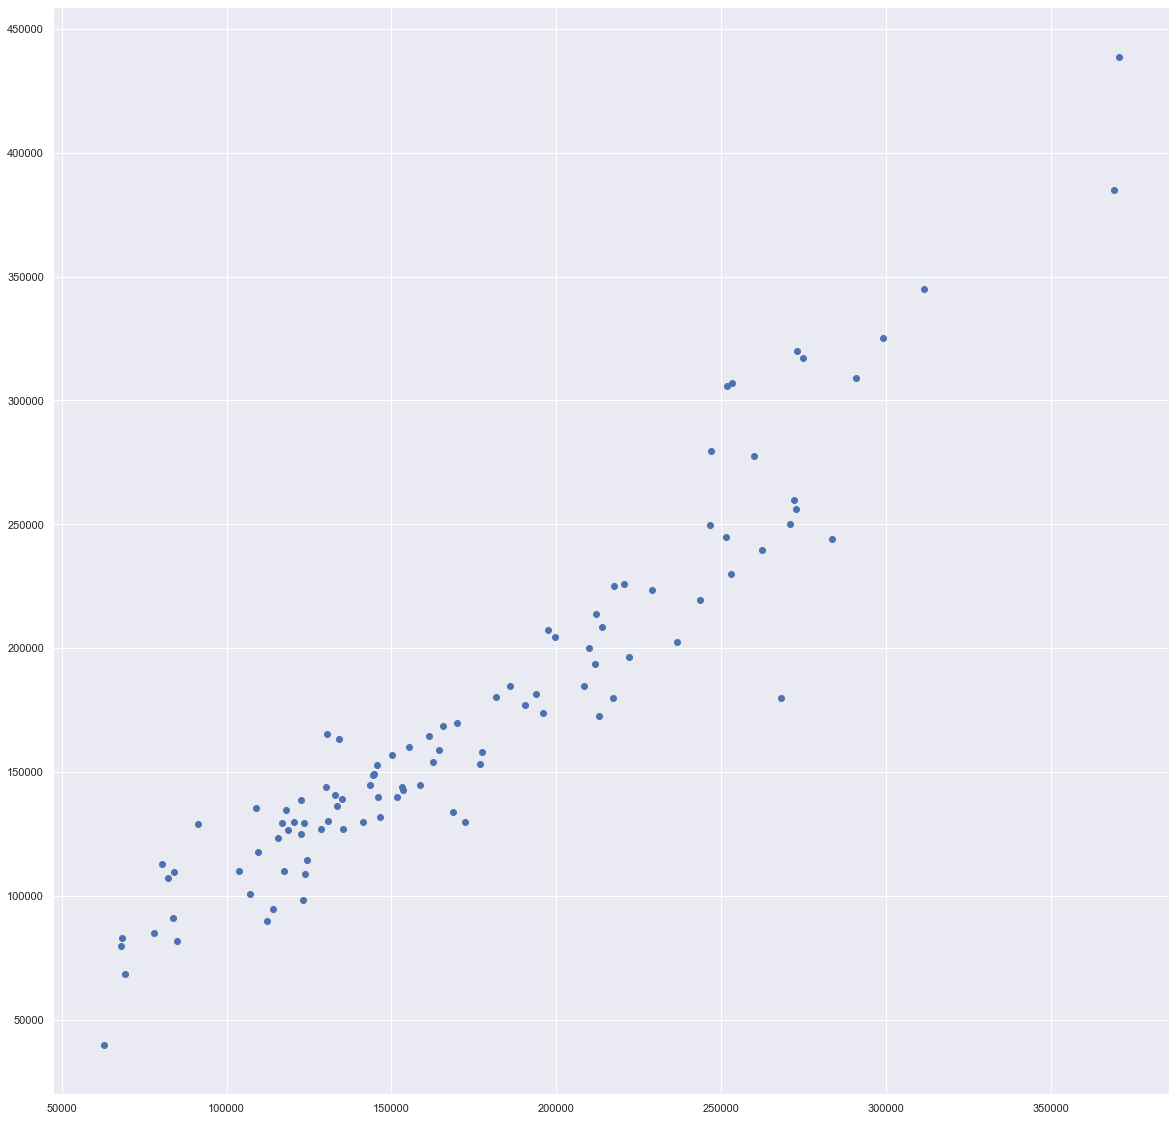

In [40]:
#Plotting the 30 feature model predictions vs actual values
plt.scatter(predictions30,y)

The bar graphs below show the actual sales price minus the predictions of the 5 feeature model and the actual sales price minus the predictions of the 30 feature model.
* the 30 feature model has a higher peak around 0 denoting more accurate predictions
* the 30 feature model has a distribution more tightly and better centered around 0
* the 30 feature has a more normal looking distribution


(array([ 1.,  0.,  2.,  2.,  1.,  9.,  7.,  8., 12.,  9.,  9., 10., 10.,
         6.,  4.,  2.,  3.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-72416.69551558, -65289.14937469, -58161.60323381, -51034.05709292,
        -43906.51095204, -36778.96481115, -29651.41867027, -22523.87252938,
        -15396.3263885 ,  -8268.78024761,  -1141.23410673,   5986.31203416,
         13113.85817504,  20241.40431593,  27368.95045681,  34496.4965977 ,
         41624.04273858,  48751.58887947,  55879.13502035,  63006.68116124,
         70134.22730213,  77261.77344301,  84389.3195839 ,  91516.86572478,
         98644.41186567, 105771.95800655]),
 <BarContainer object of 25 artists>)

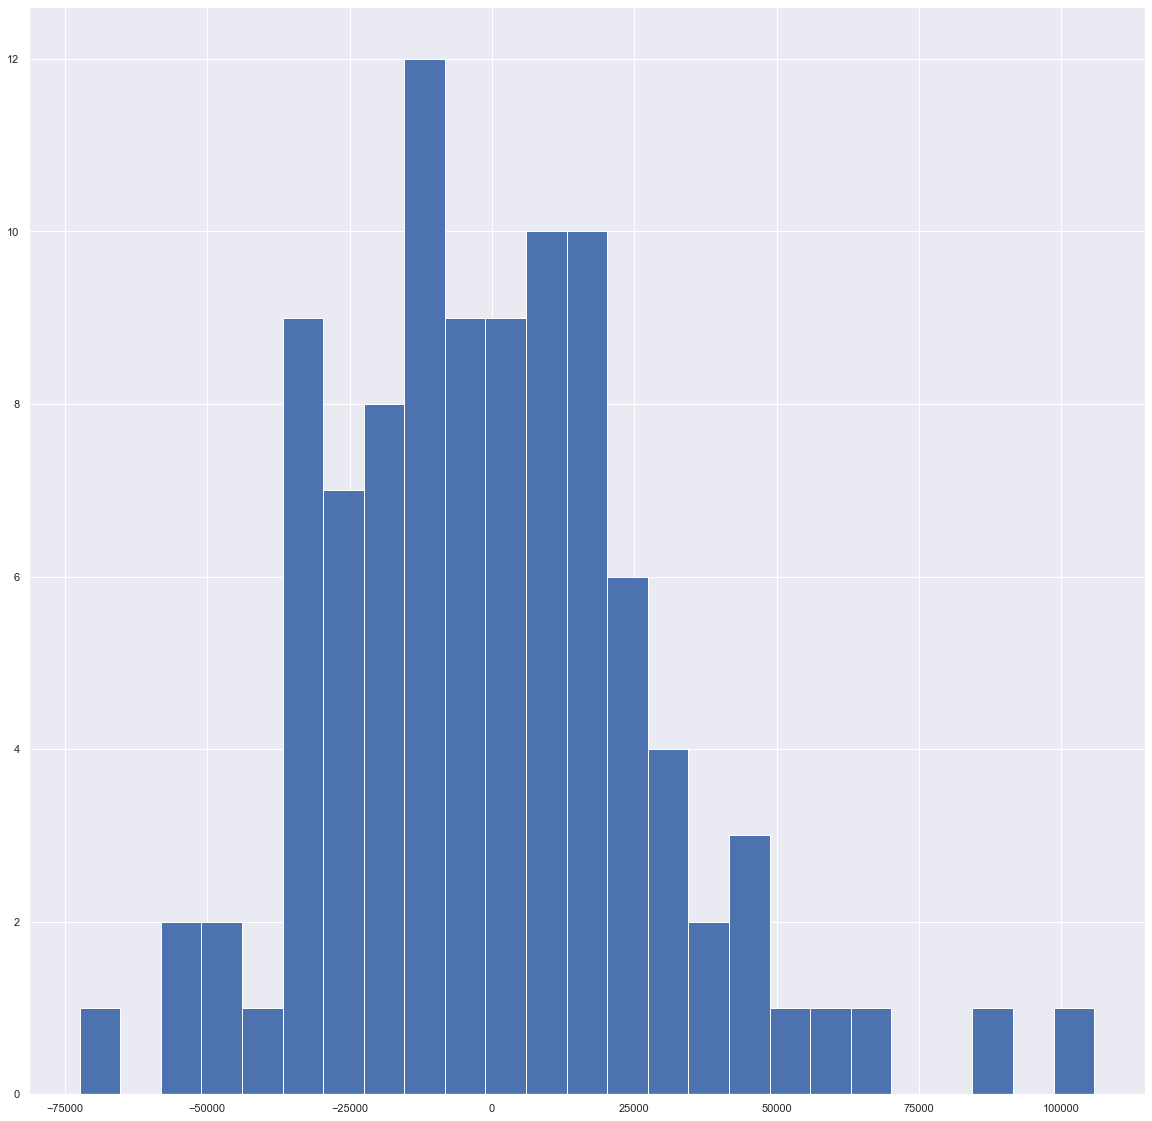

In [41]:
#Graphing the 5 feature model predictions minus actual values for SalePrice
plt.hist(y-predictions5, bins=25)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  1., 11.,  7., 11.,
        12., 14., 13.,  9.,  0.,  5.,  4.,  2.,  1.,  2.,  0.,  1.]),
 array([-88073.94154291, -81824.82270982, -75575.70387672, -69326.58504363,
        -63077.46621053, -56828.34737743, -50579.22854434, -44330.10971124,
        -38080.99087815, -31831.87204505, -25582.75321195, -19333.63437886,
        -13084.51554576,  -6835.39671267,   -586.27787957,   5662.84095353,
         11911.95978662,  18161.07861972,  24410.19745281,  30659.31628591,
         36908.43511901,  43157.5539521 ,  49406.6727852 ,  55655.79161829,
         61904.91045139,  68154.02928448]),
 <BarContainer object of 25 artists>)

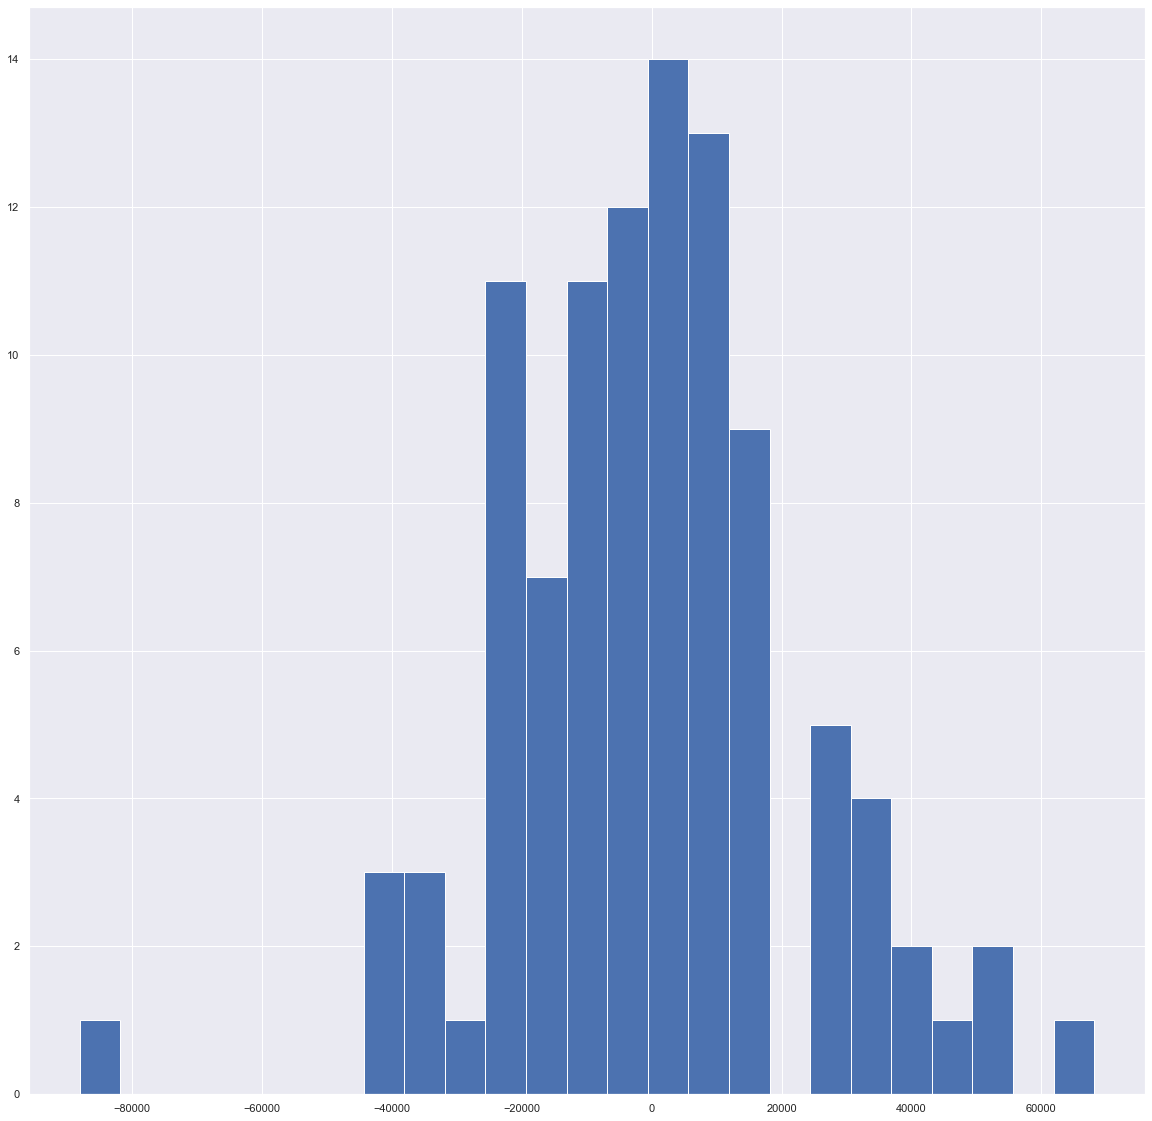

In [42]:
#Graphing the 30 feature model predictions minus actual values for SalePrice
plt.hist(y - predictions30, bins=25)

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Testing the models showed that they have predictive power. The 30 feature log(y) model was able to acheive am impressive R<sup>2</sup> value of .862. The regular 30 feature model produced an R<sup>2</sup> of .800.  Both models did not perform as well as they did on the training data. This was to be fully expected as the test data was unseen and has different characteristics than the training data.

In [43]:
df_test=pd.read_csv('jtest.csv',index_col = 0) #reading the test data
df_test.shape #verifying the shape matches that of the training data

(100, 81)

In [44]:
#Dropping all with nulls above 10% as before
df_test.drop('PoolQC', axis=1, inplace=True)
df_test.drop('Alley', axis=1, inplace=True)
df_test.drop('MiscFeature', axis=1, inplace=True)
df_test.drop('Fence', axis=1, inplace=True)
df_test.drop('FireplaceQu', axis=1, inplace=True)
df_test.drop('LotFrontage', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)
df_test.drop('PoolArea', axis=1, inplace=True)

In [45]:
#cleaning the data and ensuring only numeric values are present
data_test=df_test.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data_test.isnull().sum() != 0)
data_test.shape #verifying the shape matches that of the training data

(100, 35)

In [46]:
x_test=data_test[col30] #preparing the 30 feature test data
y_test=x_test['SalePrice'] #preparing the test data for dependent variable
ylog_test=np.log(y_test) #preparing the test data for the log of dependent variable
x_test=x_test.drop(['SalePrice'], axis=1) #dropping the dependent variable from the test data
x_test #trust but verify

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,...,YrSold,MoSold,KitchenAbvGr,EnclosedPorch,BedroomAbvGr,OverallCond,BsmtFullBath,LowQualFinSF,BsmtFinSF2,MiscVal
100,6,1610,480,2,1977,1610,1977.0,2,28.0,6,...,2010,2,1,0,3,7,1,0,0,0
101,6,1732,476,2,1985,741,1985.0,2,336.0,7,...,2010,6,1,0,3,5,0,0,0,0
102,5,1535,410,2,1979,0,1979.0,2,0.0,8,...,2009,6,2,0,4,5,0,0,0,0
103,7,1226,740,3,2009,1226,2009.0,2,0.0,6,...,2010,5,1,0,3,5,0,0,0,0
104,7,1818,240,1,1931,1040,1951.0,1,600.0,7,...,2007,6,1,0,4,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,6,1456,440,2,1976,855,1976.0,2,0.0,7,...,2009,7,1,0,3,6,0,0,0,0
196,7,1726,786,3,2007,1726,2007.0,2,205.0,8,...,2007,9,1,0,3,5,1,0,0,0
197,8,3112,795,2,1918,1360,1918.0,2,0.0,8,...,2006,3,1,552,4,4,1,392,184,0
198,6,2229,0,0,1912,755,1961.0,1,0.0,8,...,2009,7,1,30,5,6,0,371,0,0


In [47]:
#Testing the 30 feature model on the test data
predictions=model30.predict(x_test)
print(f"R^2 is {model30.score(x_test,y_test)}")

R^2 is 0.7996691877250601


In [48]:
#Testing the 30 feature log model on the test data 
predicitions_log=model30_l.predict(x_test)
print(f"R^2 is {model30_l.score(x_test,ylog_test)}")

R^2 is 0.8625150807734367


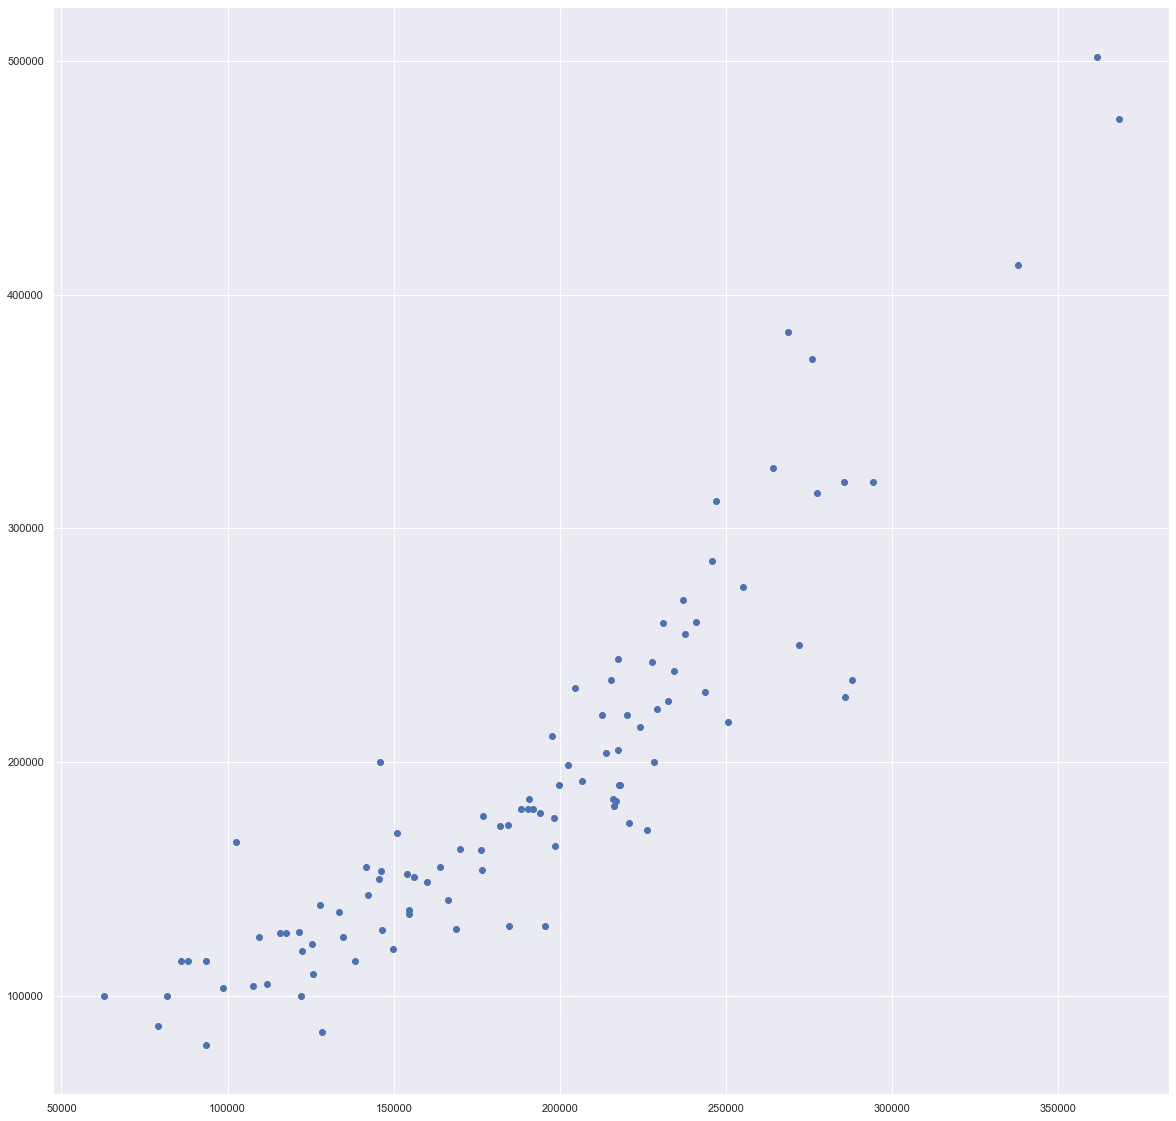

In [49]:
#Plotting the 30 feature model predictions vs the test actual values
plt.scatter(predictions,y_test)

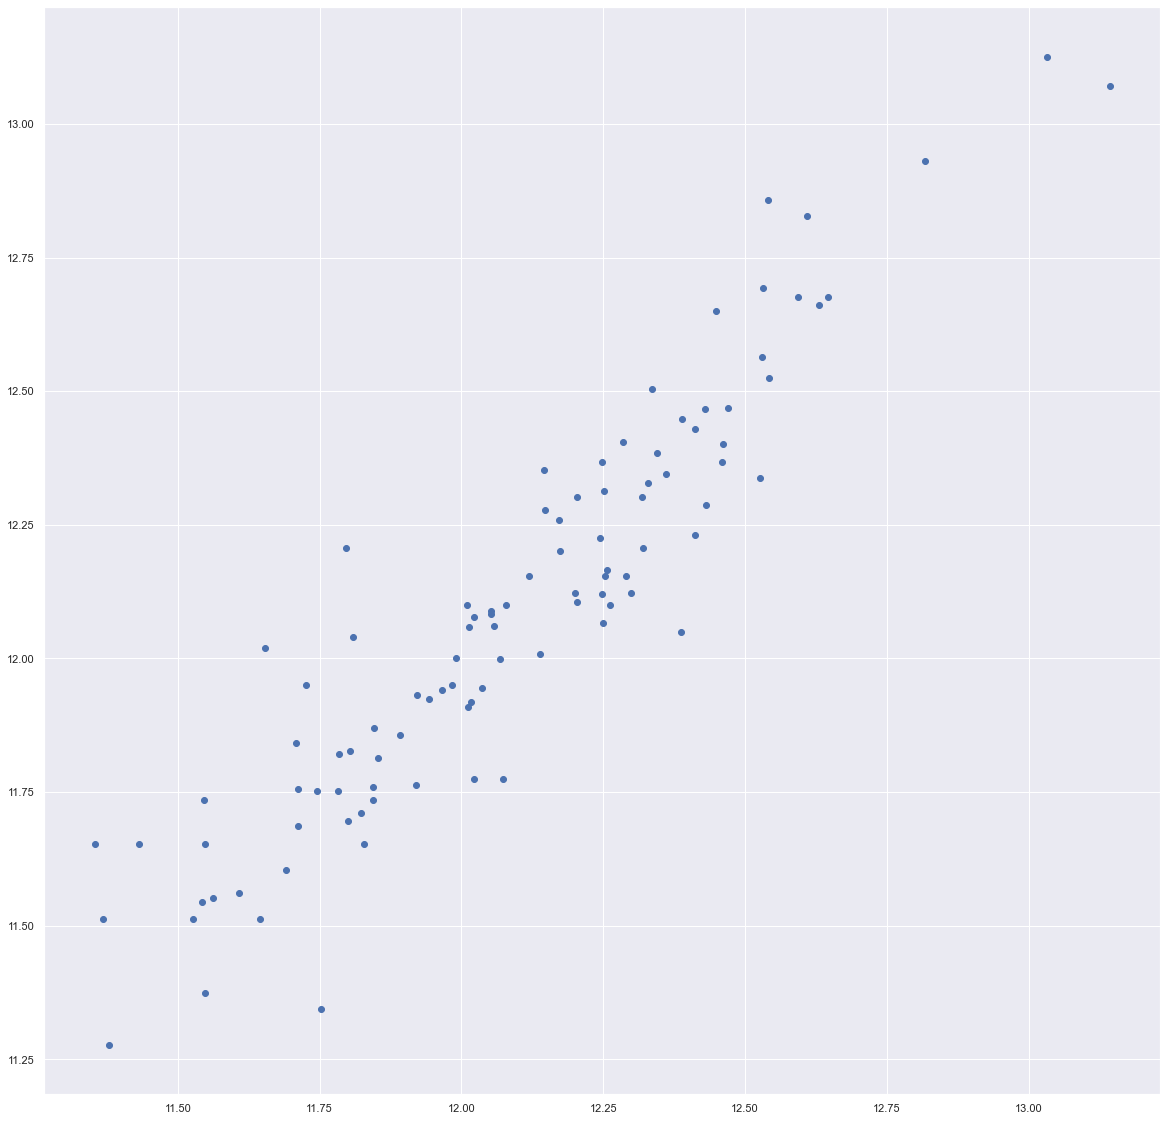

In [50]:
#Plotting the 30 feature log model predictions vs the test actual values
plt.scatter(predicitions_log,ylog_test)

As evidnet from both the R<sup>2</sup> values and the scatter plots (tighter grouping with an easily imagineable trendline), the 30 feature log model performed better than the non log model.

[Back to top](#Index)

## Conclusion

As more variables were added, the linear regression models became more accurate with more explanatory power. Secondly, the log dependent variable models performed better for higher feature models. Ultimately, the 30 feature log model performed the best (R<sup>2</sup> of 0.907 on the train data and R<sup>2</sup> of 0.863 on the test) and was accurately able to predict house prices in the previously unseen test data.

Analysing the data using graphs, tables and mathmatical functions was crucialy important to the success of the project. Everything from cleaing the data, to sorting the features by their Pearson correlation coefficient built the ground work for a successful linear regression model. Furthermore, analysis with graphs and R<sup>2</sup> values was crucial for gauging the predictive power of the models. 

Throughout this project, I gleamed many insights. 

Some were straightforward:
* the models with more features performed better
* clean good data is needed for good models
* applying the scientific method to data analysis and model building can be powerful

Some insights took more time to develop:
* the log dependent variable linear regression model performed best
* though more features proved to make better models, there was a diminishing return of value for each added

It was interesting to see how powerful yet simple a linear regression model can be. The models could definetley be improved by including non-numeric data, more observations, more features, testing more types of models and different types of linear regression models etc. Regardless, I think the models proved pretty accurate given the circumstances.

This project was a mere glimpse into the world machine learning. It really gives me an appreciation for the effort put into making some of the large and complex models I read about or even the ones we all take for granted and use in the real world.


[Back to top](#Index
)
## References

-  <sup>1</sup> Frost, Jim, et al. “Overfitting Regression Models: Problems, Detection, and Avoidance.” Statistics By Jim, 5 Apr. 2021, https://statisticsbyjim.com/regression/overfitting-regression-models/. 

- <sup>2</sup> Sevey, Ryan. “How Much Data Is Needed to Train a (Good) Model?” DataRobot AI Cloud, 10 Mar. 2021, https://www.datarobot.com/blog/how-much-data-is-needed-to-train-a-good-model/. 

- <sup>3</sup> Godwin, James Andrew. “An Introduction to Linear Regression.” Medium, Towards Data Science, 20 Mar. 2021, https://towardsdatascience.com/an-introduction-to-linear-regression-9cbb64b52d23. 

- <sup>4</sup> “Sklearn.linear_model.Linearregression.” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear+regression#sklearn.linear_model.LinearRegression. 

- <sup>5</sup> https://i.stack.imgur.com/JxedC.jpg
> for an image of the formulas being used to calculate the coefficients and the intercept

And of Course...
- Dr.Williams and the MITxPRO Data Engineering Course